In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [2]:
%cd ~/programs/avid

/home/nicholas/programs/avid


In [3]:
from pathlib import Path
import pyrallis
from avid.config import MainConfig
import orbax.checkpoint as ocp

from avid.training_state import TrainingRun
from avid.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
# run_dir = Path('logs') / 'e_form_no_downsample_564'
run_dir = Path('logs') / 'e_form_equivariant_patch_235'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

model = config.build_regressor()

ckpt = best_ckpt(run_dir)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nicholas/programs/avid/logs/e_form_equivariant_patch_235/final_ckpt/ckpts

Restoring item from /home/nicholas/programs/avid/logs/e_form_equivariant_patch_235/final_ckpt/ckpts/12599.

Finished restoring checkpoint from                                                                                 
/home/nicholas/programs/avid/logs/e_form_equivariant_patch_235/final_ckpt/ckpts/12599.

In [4]:
from avid.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
debug_stat(params);

arg0
├── head
│   ├── Dense_0
│   │   ├── bias
│   │   │   └── -0.001
│   │   └── kernel
│   │       └── -0.003
│   ├── Dense_1
│   │   ├── bias
│   │   │   └── -0.022
│   │   └── kernel
│   │       └── -0.003
│   ├── Dense_2
│   │   ├── bias
│   │   │   └── -0.051
│   │   └── kernel
│   │       └── -0.001
│   ├── Dense_3
│   │   ├── bias
│   │   │   └── 0.074
│   │   └── kernel
│   │       └── 0.005
│   ├── LayerNorm_0
│   │   ├── bias
│   │   │   └── 0.014
│   │   └── scale
│   │       └── 0.098
│   ├── LayerNorm_1
│   │   ├── bias
│   │   │   └── 0.010
│   │   └── scale
│   │       └── 0.095
│   └── LayerNorm_2
│       ├── bias
│       │   └── 0.007
│       └── scale
│           └── 0.089
├── im_embed >>> inner >>> O3Patchify_0
│   ├── kernel
│   │   └── 0.065
│   └── patch_proj
│       ├── bias
│       │   └── 0.002
│       └── kernel
│           └── 0.000
├── mixer
│   ├── EquivariantMixerMLP_0
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── 0.000
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── -0.001
│   ├── EquivariantMixerMLP_1
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── 0.002
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── -0.004
│   ├── EquivariantMixerMLP_2
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── -0.001
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── -0.002
│   ├── EquivariantMixerMLP_3
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── 0.001
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── 0.004
│   ├── LazyInMLP_0
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── -0.035
│   │   │   └── kernel
│   │   │       └── -0.001
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── -0.001
│   │   │   └── kernel
│   │   │       └── 0.000
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── 0.000
│   │       └── scale
│   │           └── 0.121
│   ├── LazyInMLP_1
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── -0.011
│   │   │   └── kernel
│   │   │       └── 0.000
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── 0.000
│   │   │   └── kernel
│   │   │       └── 0.000
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── 0.000
│   │       └── scale
│   │           └── 0.102
│   ├── LazyInMLP_2
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── -0.013
│   │   │   └── kernel
│   │   │       └── -0.000
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── -0.000
│   │   │   └── kernel
│   │   │       └── -0.000
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── 0.000
│   │       └── scale
│   │           └── 0.101
│   └── LazyInMLP_3
│       ├── Dense_0
│       │   ├── bias
│       │   │   └── -0.010
│       │   └── kernel
│       │       └── -0.001
│       ├── Dense_1
│       │   ├── bias
│       │   │   └── 0.000
│       │   └── kernel
│       │       └── -0.000
│       └── LayerNorm_0
│           ├── bias
│           │   └── 0.001
│           └── scale
│               └── 0.135
└── spec_embed >>> species_embed >>> species_embed >>> embedding
    └── -0.000

In [5]:
from avid.utils import ELEM_VALS
spec_emb = params['spec_embed']['species_embed']['species_embed']['embedding']

spec_df = pd.DataFrame(spec_emb, index=ELEM_VALS)
spec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Li,0.093113,-0.025857,0.180057,-0.110016,-0.191999,-0.087949,-0.138782,0.028680,-0.046321,-0.024310,...,-0.037327,-0.063875,-0.050567,0.084334,-0.066933,-0.032283,-0.052915,0.081689,-0.091041,-0.054069
Be,0.014294,-0.027725,0.192479,-0.092127,0.196132,-0.092261,0.030840,0.030207,0.057840,0.207946,...,0.064849,-0.046218,0.027800,-0.015500,0.043884,0.038320,0.085020,0.010146,-0.095897,0.042380
B,0.333206,-0.012017,-0.038891,-0.094946,0.465066,0.146542,-0.144735,-0.046287,0.128058,0.042099,...,0.064740,-0.140836,0.078615,0.019348,0.005661,-0.183653,0.593977,0.121753,-0.022942,-0.031951
N,-0.004870,0.036923,0.090351,0.021457,0.043433,-0.327646,0.085421,0.017235,-0.005445,0.084453,...,-0.010837,-0.063463,0.081851,-0.086508,0.056753,0.096135,0.088594,0.053429,0.153924,-0.095316
O,0.007742,0.030244,-0.011298,0.067040,-0.015163,0.023745,0.034494,-0.056131,-0.070751,-0.047034,...,-0.059935,0.059533,0.033013,0.035187,0.047243,-0.033872,0.036039,0.047524,-0.054909,-0.048866


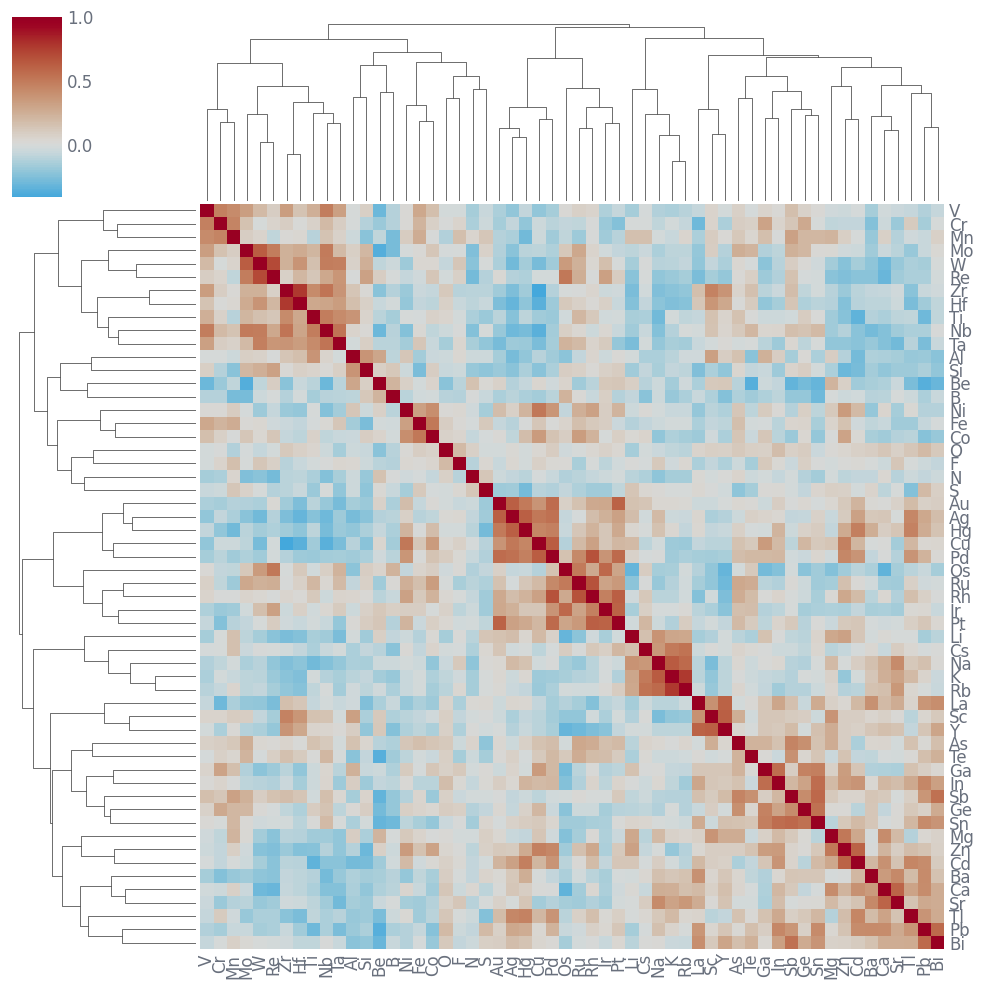

In [6]:
sns.clustermap(spec_df.T.corr(), xticklabels=1, yticklabels=1, cmap='rho_diverging', center=0)

In [7]:
debug_stat(params['mixer']['EquivariantMixerMLP_0']);

arg0
├── EquivariantLinear_0 >>> kernel
│   └── 0.000
└── EquivariantLinear_1 >>> kernel
    └── -0.001

<Axes: >

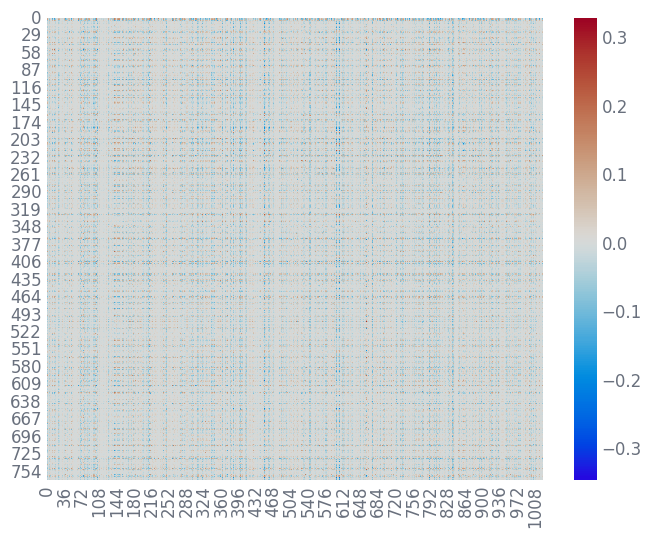

In [8]:
sns.heatmap(params['head']['Dense_0']['kernel'], center=0, cmap='rho_diverging')

<Axes: ylabel='Density'>

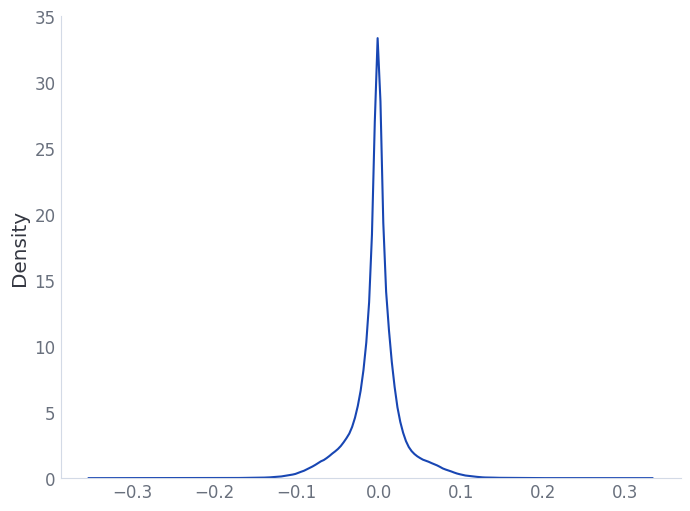

In [9]:
sns.kdeplot(params['head']['Dense_0']['kernel'].reshape(-1))

In [10]:
from umap import UMAP
import plotly.express as px

umap = UMAP(n_neighbors=15, metric='euclidean')

spec_df[['x', 'y']] = umap.fit_transform(spec_df.iloc[:64].values)

spec_df.columns = [str(c) for c in spec_df.columns]
px.scatter(spec_df.reset_index(), x='x', y='y', text='index', width=800, height=800, opacity=0)

In [11]:
debug_structure(params);

arg0
├── head
│   ├── Dense_0
│   │   ├── bias
│   │   │   └── float32[1024]
│   │   └── kernel
│   │       └── float32[768, 1024]
│   ├── Dense_1
│   │   ├── bias
│   │   │   └── float32[1024]
│   │   └── kernel
│   │       └── float32[1024, 1024]
│   ├── Dense_2
│   │   ├── bias
│   │   │   └── float32[512]
│   │   └── kernel
│   │       └── float32[1024, 512]
│   ├── Dense_3
│   │   ├── bias
│   │   │   └── float32[1]
│   │   └── kernel
│   │       └── float32[512, 1]
│   ├── LayerNorm_0
│   │   ├── bias
│   │   │   └── float32[1024]
│   │   └── scale
│   │       └── float32[1024]
│   ├── LayerNorm_1
│   │   ├── bias
│   │   │   └── float32[1024]
│   │   └── scale
│   │       └── float32[1024]
│   └── LayerNorm_2
│       ├── bias
│       │   └── float32[512]
│       └── scale
│           └── float32[512]
├── im_embed >>> inner >>> O3Patchify_0
│   ├── kernel
│   │   └── float32[8, 4]
│   └── patch_proj
│       ├── bias
│       │   └── float32[384]
│       └── kernel
│           └── float32[512, 384]
├── mixer
│   ├── EquivariantMixerMLP_0
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── bfloat16[35]
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── bfloat16[35]
│   ├── EquivariantMixerMLP_1
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── bfloat16[35]
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── bfloat16[35]
│   ├── EquivariantMixerMLP_2
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── bfloat16[35]
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── bfloat16[35]
│   ├── EquivariantMixerMLP_3
│   │   ├── EquivariantLinear_0 >>> kernel
│   │   │   └── bfloat16[35]
│   │   └── EquivariantLinear_1 >>> kernel
│   │       └── bfloat16[35]
│   ├── LazyInMLP_0
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── kernel
│   │   │       └── float32[384, 256]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── float32[384]
│   │   │   └── kernel
│   │   │       └── float32[256, 384]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── float32[256]
│   │       └── scale
│   │           └── float32[256]
│   ├── LazyInMLP_1
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── kernel
│   │   │       └── float32[384, 256]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── float32[384]
│   │   │   └── kernel
│   │   │       └── float32[256, 384]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── float32[256]
│   │       └── scale
│   │           └── float32[256]
│   ├── LazyInMLP_2
│   │   ├── Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── kernel
│   │   │       └── float32[384, 256]
│   │   ├── Dense_1
│   │   │   ├── bias
│   │   │   │   └── float32[384]
│   │   │   └── kernel
│   │   │       └── float32[256, 384]
│   │   └── LayerNorm_0
│   │       ├── bias
│   │       │   └── float32[256]
│   │       └── scale
│   │           └── float32[256]
│   └── LazyInMLP_3
│       ├── Dense_0
│       │   ├── bias
│       │   │   └── float32[256]
│       │   └── kernel
│       │       └── float32[384, 256]
│       ├── Dense_1
│       │   ├── bias
│       │   │   └── float32[384]
│       │   └── kernel
│       │       └── float32[256, 384]
│       └── LayerNorm_0
│           ├── bias
│           │   └── float32[256]
│           └── scale
│               └── float32[256]
└── spec_embed >>> species_embed >>> species_embed >>> embedding
    └── float32[56, 64]

In [12]:
import functools as ft
from einops import rearrange, reduce

N_GRID = 24

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = rearrange(jnp.array([xx, yy, zz]), 'd n1 n2 n3 -> (n1 n2 n3) d')


cmap = rp.list_div_coolwarm

def plot(dens, n_skip=2, thresh=0.1, cmap='auto'):
    bg_mask = abs(dens) > thresh
    skip_mask = jnp.all(jnp.round(xyz * N_GRID) % n_skip == 0, axis=1)
    mask = skip_mask & bg_mask
    color_args = {
        'color_continuous_scale': cmap
    }
    if jnp.mean(dens < 0) > 0.1:
        color_args['color_continuous_midpoint'] = 0
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_div_icefire if is_dark else rp.list_div_coolwarm
    else:
        if color_args['color_continuous_scale'] == 'auto':
            color_args['color_continuous_scale'] = rp.list_inferna if is_dark else rp.list_inferna_r
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask],
        # color=np.array(species[mask]).astype('str'),
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
        **color_args
    )

In [13]:
# spec_embed = params['spec_embed']['species_embed']['embed_module']['Dense_0']['kernel']
# sns.heatmap(spec_embed.astype(jnp.float32),
#             cmap=rp.mpl_diverging, center=0)

<Axes: ylabel='Density'>

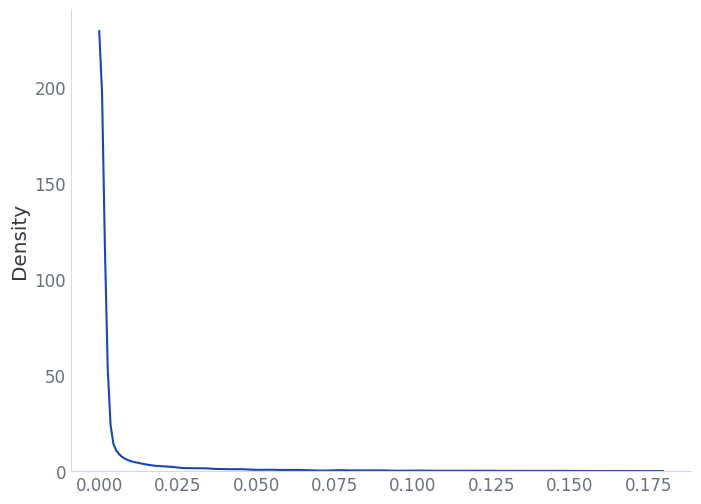

In [14]:
from avid.dataset import load_file

data = load_file(config, 0)
sns.kdeplot(data.density[0:5, ...].astype(jnp.float32).reshape(-1), cut=0)

In [15]:
batch = load_file(config, 0)
b1 = batch.density[0, ...].astype(jnp.float32)

plot(b1[..., 0].reshape(-1))

In [17]:
import einops as ein
# patchify = params['im_embed']['inner']['Patchify_0']['patch_proj']['kernel']
# patchify = patchify.reshape(3, 3, 3, 64, 256)
# patch_mean = ein.reduce(jnp.abs(patchify)[..., [2], :], 'nx ny nz chan out -> nx ny nz', 'mean')
# patches = ein.repeat(patch_mean, 'nx ny nz -> (nx r1) (ny r2) (nz r3)', r1=8, r2=8, r3=8)
# plot(patches.reshape(-1), thresh=0)

In [18]:
from avid.dataset import dataloader

num_test, test_dl = dataloader(config, split='test')

In [19]:
from avid.augmentations import randomly_augment


test_preds = []
batches = []
for batch in test_dl:
    batches.append(batch)
    test_preds.append(model(batch, training=False))

aug_preds = []
aug_batches = []

aug_rng = np.random.default_rng(413)
for batch in batches:
    aug_batch = randomly_augment(batch, True, True, False, config.voxelizer.n_grid, rng=aug_rng)
    aug_batches.append(aug_batch)
    aug_preds.append(model(aug_batch, training=False))

MAE:	0.0473
RMSE:	0.0747
Equiv:	0.0001827


Text(0, 0.5, 'Actual')

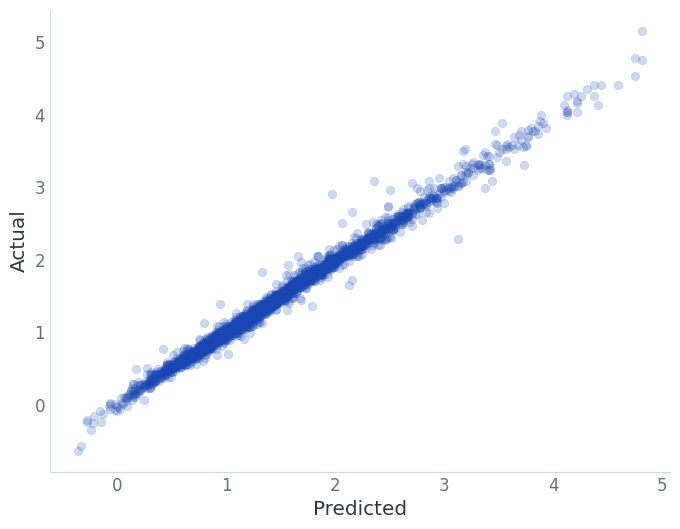

In [20]:
yhat = jnp.stack(test_preds).astype(jnp.float32).reshape(-1)
aug_yhat = jnp.stack(aug_preds).astype(jnp.float32).reshape(-1)
y = jnp.stack([batch.e_form for batch in batches]).astype(jnp.float32).reshape(-1)
aug_y = jnp.stack([batch.e_form for batch in aug_batches]).astype(jnp.float32).reshape(-1)
print('MAE:\t{:.4f}'.format(jnp.mean(jnp.abs(yhat - y))))
print('RMSE:\t{:.4f}'.format(jnp.sqrt(jnp.mean(jnp.square(yhat - y)))))
print('Equiv:\t{:.4g}'.format(jnp.mean(jnp.abs(aug_yhat - yhat))))
sns.scatterplot(x=yhat, y=y, ec=None, alpha=0.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')

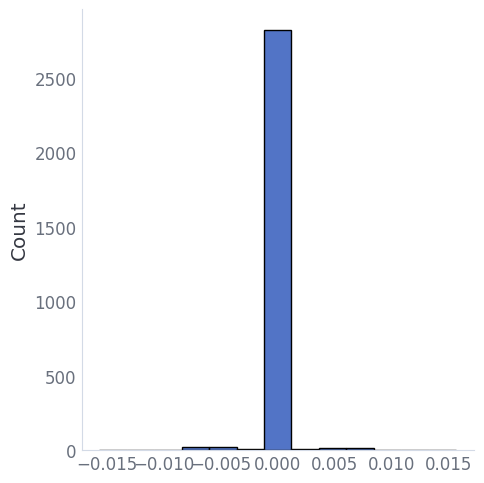

In [21]:
sns.displot(aug_yhat - yhat)

In [22]:
from bokeh.models import (
    ColumnDataSource,
    CDSView,
    LinearColorMapper,
    LogColorMapper,
    ColorBar,
    BasicTicker,
    BooleanFilter
)
from bokeh.plotting import figure, output_file
from bokeh.io import show as show_
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge
from matplotlib.colors import Normalize, LogNorm, to_hex
from matplotlib.cm import (
    ScalarMappable,
)
from pandas import options
from typing import List
import warnings


def plotter(
    values,
    show: bool = True,
    output_filename: str = None,
    width: int = 1050,
    cmap: str = "plasma",
    alpha: float = 0.65,
    extended: bool = True,
    periods_remove: List[int] = None,
    groups_remove: List[int] = None,
    log_scale: bool = False,
    cbar_height: float = None,
    cbar_standoff: int = 12,
    cbar_fontsize: int = 14,
    blank_color: str = "#c4c4c4",
    under_value: float = None,
    under_color: str = "#140F0E",
    over_value: float = None,
    over_color: str = "#140F0E",
    special_elements: List[str] = None,
    special_color: str = "#6F3023",
) -> figure:

    """
    Plot a heatmap over the periodic table of elements.

    Parameters
    ----------
    filename : str
        Path to the .csv file containing the data to be plotted.
    show : str
        If True, the plot will be shown.
    output_filename : str
        If not None, the plot will be saved to the specified (.html) file.
    width : float
        Width of the plot.
    cmap : str
        plasma, inferno, viridis, magma, cividis, turbo
    alpha : float
        Alpha value (transparency).
    extended : bool
        If True, the lanthanoids and actinoids will be shown.
    periods_remove : List[int]
        Period numbers to be removed from the plot.
    groups_remove : List[int]
        Group numbers to be removed from the plot.
    log_scale : bool
        If True, the colorbar will be logarithmic.
    cbar_height : int
        Height of the colorbar.
    cbar_standoff : int
        Distance between the colorbar and the plot.
    cbar_fontsize : int
        Fontsize of the colorbar label.
    blank_color : str
        Hexadecimal color of the elements without data.
    under_value : float
        Values <= under_value will be colored with under_color.
    under_color : str
        Hexadecimal color to be used for the lower bound color.
    over_value : float
        Values >= over_value will be colored with over_color.
    under_color : str
        Hexadecial color to be used for the upper bound color.
    special_elements: List[str]
        List of elements to be colored with special_color.
    special_color: str
        Hexadecimal color to be used for the special elements.

    Returns
    -------
    figure
        Bokeh figure object.
    """

    options.mode.chained_assignment = None

    cmap = rp.mpl_sequential
    bokeh_palette = rp.list_sequential

    # Define number of and groups
    period_label = ["1", "2", "3", "4", "5", "6", "7"]
    group_range = [str(x) for x in range(1, 19)]

    # Remove any groups or periods
    if groups_remove:
        for gr in groups_remove:
            gr = gr.strip()
            group_range.remove(str(gr))
    if periods_remove:
        for pr in periods_remove:
            pr = pr.strip()
            period_label.remove(str(pr))

    # Read in data from CSV file
    data_elements = spec_df.index
    data_list = values
    data = [float(i) for i in data_list]

    if len(data) != len(data_elements):
        raise ValueError("Unequal number of atomic elements and data points")

    if extended:
        period_label.append("blank")
        period_label.append("La")
        period_label.append("Ac")


    count = 0
    for i in range(56, 70):
        elements.loc[i, 'period'] = "La"
        elements.loc[i, 'group'] = str(count + 4)
        count += 1

    count = 0
    for i in range(88, 102):
        elements.loc[i, 'period'] = "Ac"
        elements.loc[i, 'group'] = str(count + 4)
        count += 1


    # Define matplotlib and bokeh color map
    if log_scale:
        for datum in data:
            if datum < 0:
                raise ValueError(
                    f"Entry for element {datum} is negative but log-scale is selected"
                )
        color_mapper = LogColorMapper(
            palette=bokeh_palette, low=min(data), high=max(data)
        )
        norm = LogNorm(vmin=min(data), vmax=max(data))
    else:
        color_mapper = LinearColorMapper(
            palette=bokeh_palette, low=min(data), high=max(data)
        )
        norm = Normalize(vmin=min(data), vmax=max(data))
    color_scale = ScalarMappable(norm=norm, cmap=cmap).to_rgba(data, alpha=None)

    # Set blank color
    color_list = [blank_color] * len(elements)

    # Compare elements in dataset with elements in periodic table
    for i, data_element in enumerate(data_elements):
        element_entry = elements.symbol[
            elements.symbol.str.lower() == data_element.lower()
        ]
        if element_entry.empty == False:
            element_index = element_entry.index[0]
        else:
            warnings.warn("Invalid chemical symbol: " + data_element)
        if color_list[element_index] != blank_color:
            warnings.warn("Multiple entries for element " + data_element)
        elif under_value is not None and data[i] <= under_value:
            color_list[element_index] = under_color
        elif over_value is not None and data[i] >= over_value:
            color_list[element_index] = over_color
        else:
            color_list[element_index] = to_hex(color_scale[i])

    if special_elements:
        for k, v in elements["symbol"].iteritems():
            if v in special_elements:
                color_list[k] = special_color

    # Define figure properties for visualizing data
    source = ColumnDataSource(
        data=dict(
            group=[str(x) for x in elements["group"]],
            period=[str(y) for y in elements["period"]],
            sym=elements["symbol"],
            atomic_number=elements["atomic number"],
            type_color=color_list,
        )
    )

    view = CDSView(filter=BooleanFilter([extended or period not in ['La', 'Ac'] for period in source.data['period']]))

    # Plot the periodic table
    p = figure(x_range=group_range, y_range=list(reversed(period_label)), tools="save")
    p.width = width
    p.outline_line_color = None
    p.background_fill_color = None
    p.border_fill_color = None
    p.toolbar_location = "above"
    p.rect("group", "period", 0.9, 0.9, source=source, alpha=alpha, color="type_color", view=view)
    p.axis.visible = False
    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle",
    }
    x = dodge("group", -0.4, range=p.x_range)
    y = dodge("period", 0.3, range=p.y_range)
    p.text(
        x=x,
        y="period",
        text="sym",
        text_font_style="bold",
        text_font_size="16pt",
        view=view,
        **text_props,
    )
    p.text(x=x, y=y, text="atomic_number", text_font_size="11pt", view=view, **text_props)

    color_bar = ColorBar(
        color_mapper=color_mapper,
        ticker=BasicTicker(desired_num_ticks=10),
        border_line_color=None,
        label_standoff=cbar_standoff,
        location=(0, 0),
        orientation="vertical",
        scale_alpha=alpha,
        major_label_text_font_size=f"{cbar_fontsize}pt",
    )

    if cbar_height is not None:
        color_bar.height = cbar_height

    p.add_layout(color_bar, "right")
    p.grid.grid_line_color = None

    if output_filename:
        output_file(output_filename)

    if show:
        show_(p)

    return p

In [23]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [24]:
from pymatgen.core import Element
from statistics import mean

specs = [Element(x) for x in spec_df.index]
plotter([element.electron_affinity for element in specs], extended=False, alpha=0.65, width=1000)

/tmp/ipykernel_1837930/83109152.py:133: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'La' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



figure(id='p1008', ...)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
comps = pca.fit_transform(spec_df.iloc[:64])

fig = plotter(comps.T[0], extended=False, alpha=0.65, width=1000)